# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 3: Otimização** <br/>

Basicamente, iremos utilizar alguns métodos de otimização, para maximizar ou minimizar a saída de uma função. No exemplo, abaixo, qual valor de $x$ produz o menor valor de $y$?

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[ 90  72  56  42  30  20  12   6   2   0   0   2   6  12  20  30  42  56
  72  90 110]


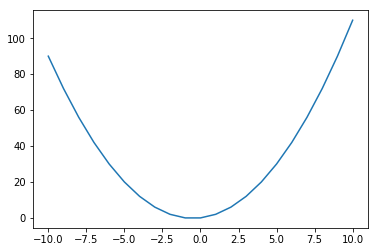

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def quad(x):
    return x*x + x

x = np.arange(-10,11)
y = quad(x)
print(x)
print(y)

plt.plot(x,y)


In [76]:
from scipy.optimize import minimize
x0=90000000
res = minimize(quad, x0)
print(res.x)

[-0.49999974]


**Exemplo multidimensional**

A função Rosenbrock  com $N$ variáveis é descrita da seguinte maneira:


\begin{equation}
f(x) = \sum_{i = 1}^{N-1} \:100(x_i - x_{i-1}^{2})
\end{equation}

Sendo o valor mínimo da função igual a 0, quando $x_i$ é igual a 1. Considere a implementação abaixo, em que há apenas duas variáveis.

[3.609e+03 4.040e+02 1.000e+00 0.000e+00 4.010e+02]


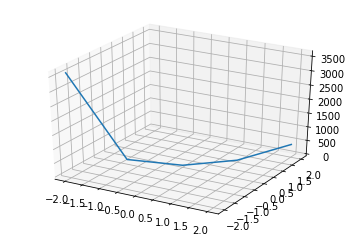

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rosen(parametros):
    x1,x2 = parametros
    """função Rosenbrock"""
    return 100.0*(x1-x2**2)**2.0 + (x2-1)**2

x1 = np.arange(-2,3)
x2 = np.arange(-2,3)
y = rosen([x1,x2])
print(y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x1, x2, y)



In [78]:
from scipy.optimize import minimize

x0 = np.array([-100, -100])
res = minimize(rosen, x0)
print(res.x)
res.fun

[0.99999102 0.99999552]


2.011035475809454e-11

In [79]:
from scipy.optimize import minimize

x0 = np.array([-10000, -10000])
res = minimize(rosen, x0)
print(res.x)
res.fun


[ 6.97591357e+07 -8.35219419e+03]


69790428.90865304

Modifique a função Rosenbrock para receber qualquer quantidade de variáveis.

Com $4$ variáveis, com $x0=1000$, é possível encontrar  o resultado correto?

In [80]:
def rosen(x):
...     return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

from scipy.optimize import minimize

x0 = np.array([1000, 1000, 1000, 1000])
res = minimize(rosen, x0)
print(res.x)
res.fun

[-3.62463575e+00  1.35943504e+01  1.85248692e+02  3.43158223e+04]


34325.65728001662

Outra forma de obter uma solução para o problema, é utilizar algoritmos que fornecem respostas aproximadas. Os algoritmos evolucionários utilizam a teoria de Darwin, em que os indivíduos (soluções) mais bem adaptados são selecionados.

In [81]:
from scipy.optimize import differential_evolution
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

limites = [(-1000, 1000), (-1000, 1000), (-1000, 1000), (-1000, 1000)]
result = differential_evolution(rosen, limites)
print(result.x)
print(result.fun)

[1. 1. 1. 1.]
3.675246159439518e-24


Atividade: resolver a função Rastrigin

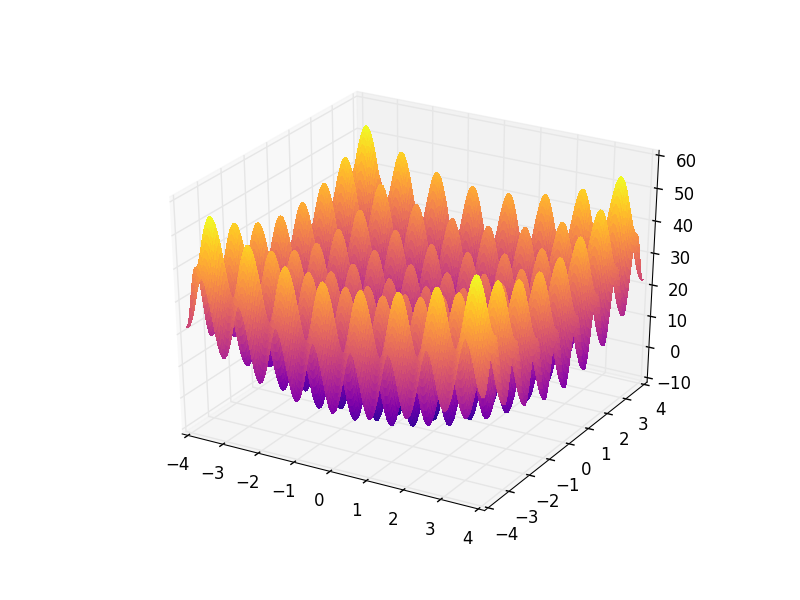

Próximo assunto: Problemas de regressão

**Referências**

https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution